<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/Jamboree_Business_Case_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jamboree Education - Linear Regression


####Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, poisson,expon, geom, binom, ttest_1samp, ttest_ind, ttest_rel, chi2,chi2_contingency, chi2, chisquare, f_oneway, levene, shapiro, kruskal
import math
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
!gdown 1XPNIrFgmjcivmRGgbcF_1e0vXMV7_SzH

Downloading...
From: https://drive.google.com/uc?id=1XPNIrFgmjcivmRGgbcF_1e0vXMV7_SzH
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 44.5MB/s]


In [ ]:
df = pd.read_csv("/content/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df=df.drop(['Serial No.'], axis=1)

In [ ]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Lets see the distribution of the variables of graduate applicants.


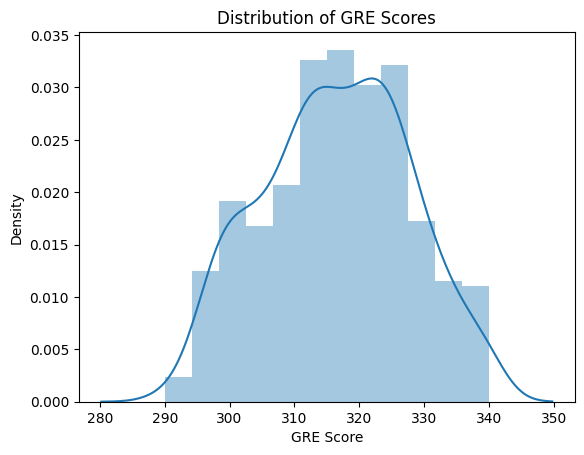

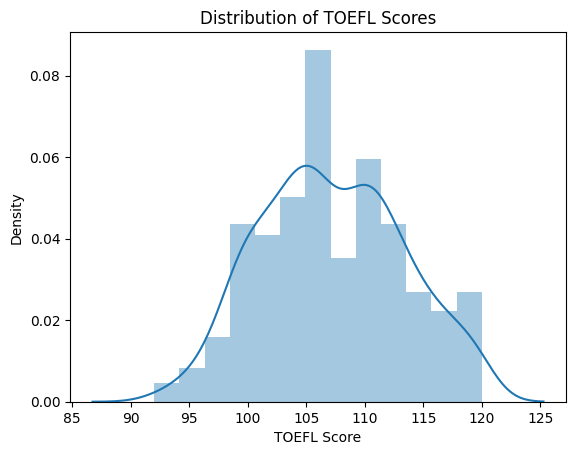

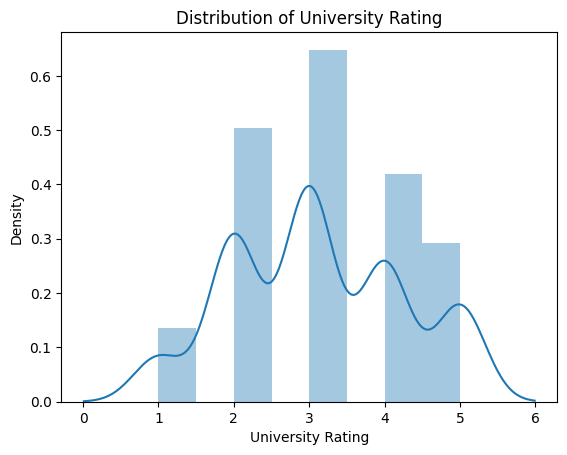

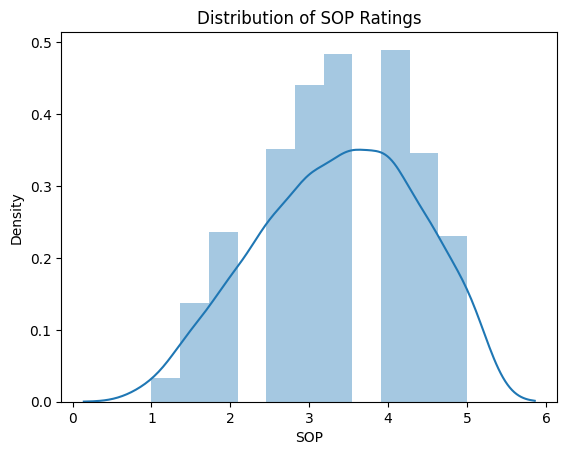

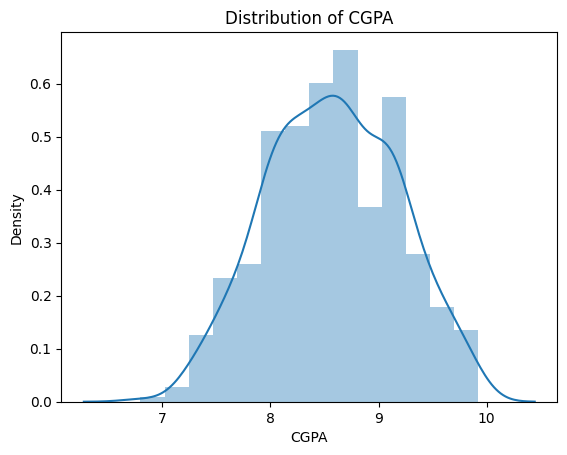

In [ ]:
fig = sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

It is clear from the distributions, students with varied merit apply for the universit

**Understanding the relation between different factors responsible for graduate
admissions**

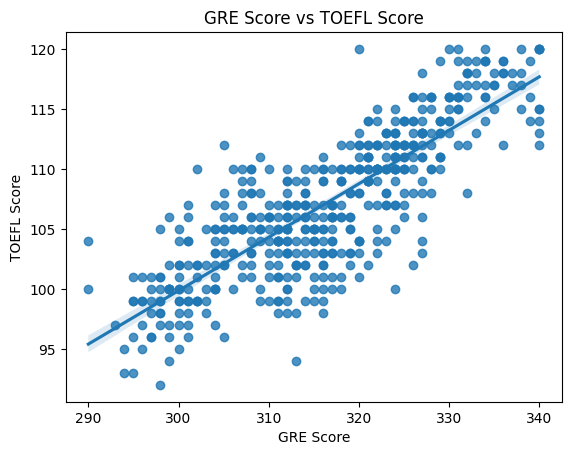

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()


People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable


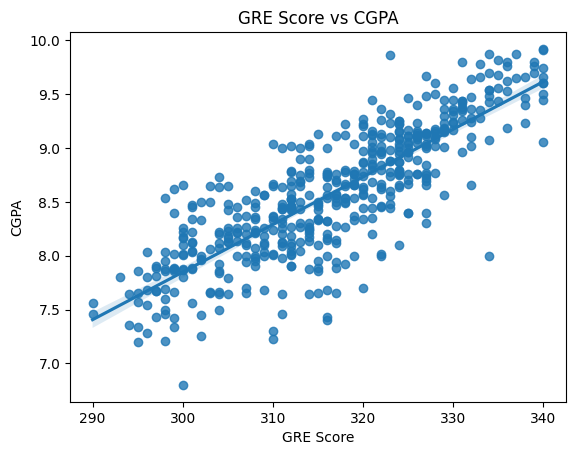

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores
maybe because they are smart or hard working

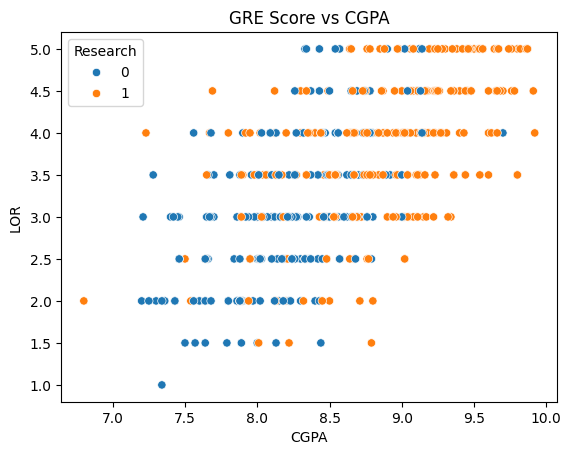

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()


LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on
that persons academic excellence. Having research experience is usually related with a
good LOR which might be justified by the fact that supervisors have personal interaction
with the students performing research which usually results in good LORs


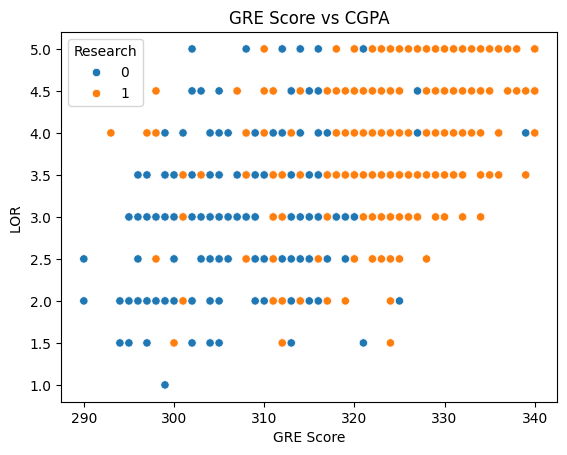

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all
kinds of GRE scores


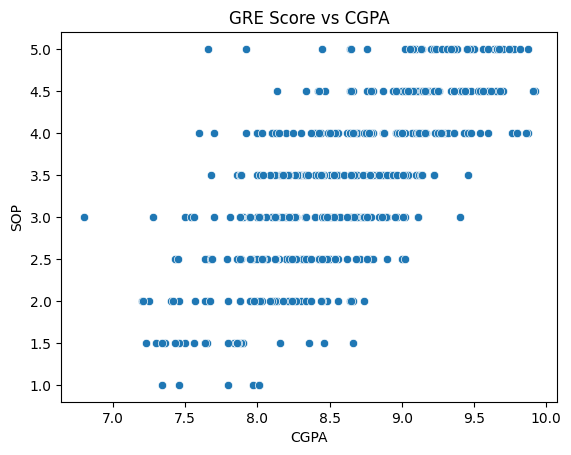

In [ ]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


CGPA and SOP are not that related because Statement of Purpose is related to academic
performance, but since people with good CGPA tend to be more hard working so they have
good things to say in their SOP which might explain the slight move towards higher CGPA
as along with good SOPs


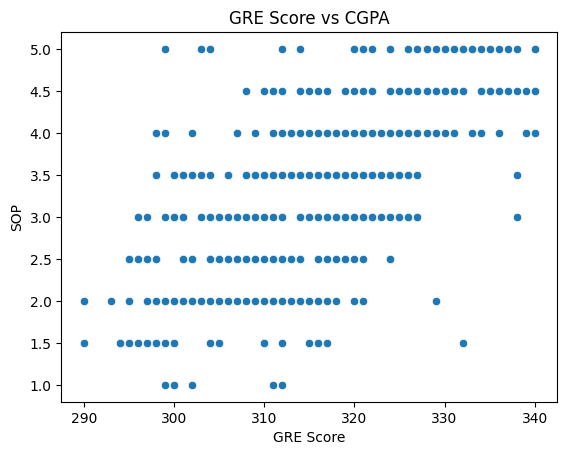

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related


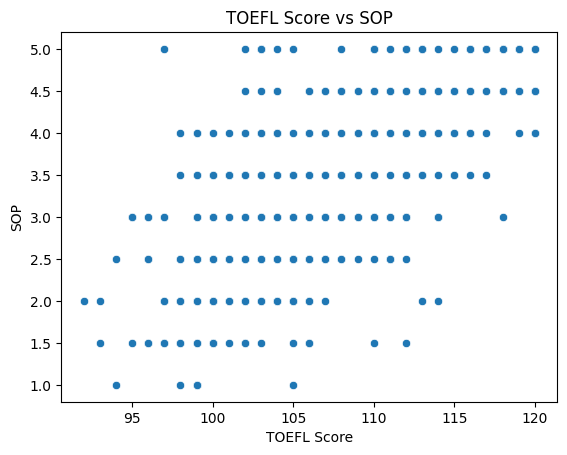

In [ ]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()


Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of
SOP is not always related to the applicants English skills.


**Correlation among variables**

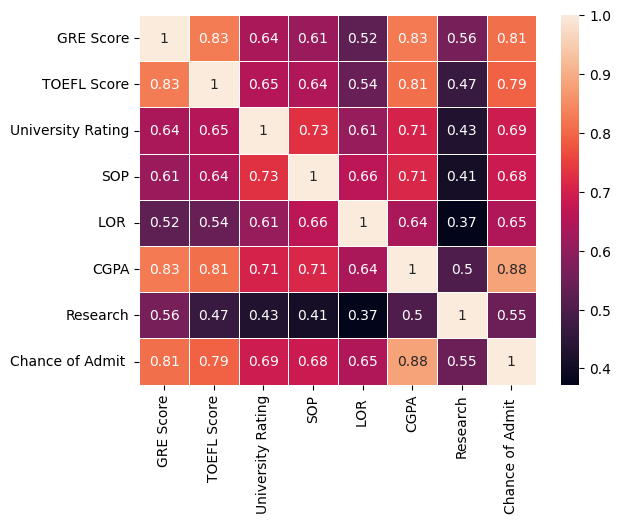

In [ ]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, linewidths=0.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs


In [ ]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [ ]:
y_train

,Chance of Admit
249,0.77
433,0.71
19,0.62
322,0.72
332,0.75
...,...
106,0.87
270,0.72
348,0.57
435,0.55


In [ ]:
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


Lets use a bunch of different algorithms to see which model performs better


In [ ]:
models = [ ['Linear Regression :', LinearRegression()],
 ['Lasso Regression :', Lasso(alpha=0.1)],
 ['Ridge Regression :', Ridge(alpha=1.0)] ]
print("Results without removing features with multicollinearity ...")
for name,model in models:
 model.fit(X_train, y_train.values)
 predictions = model.predict(std.transform(X_test))
 print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.06086588041578314
Lasso Regression : 0.12242927166741772
Ridge Regression : 0.06087507177653933


**Linear Regression using Statsmodel library**
* Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1,
where a higher value generally indicates a better fit, assuming certain conditions are
met.
* Const coefficient is your Y-intercept. It means that if both the Interest_Rate and
* Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would
be equal to the const coefficient.
* Interest_Rate coefficient represents the change in the output Y due to a change of one
unit in the interest rate (everything else held constant)
* Unemployment_Rate coefficient represents the change in the output Y due to a change
of one unit in the unemployment rate (everything else held constant)
* STD err reflects the level of accuracy of the coefficients. The lower it is, the higher is the
level of accuracy
* P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically
significant
* Confidence Interval represents the range in which our coefficients are likely to fall (with a
likelihood of 95%)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        16:56:52   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          2.01e-143
Time:                        16:56:52   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

**VIF(Variance Inflation Factor)**

* VIF score of an independent variable represents how well the variable is explained by
other independent variables.
* So, the closer the R^2 value to 1, the higher the value of VIF and the higher the
multicollinearity with the particular independent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
 dataset=dataset.drop(columns=col,axis=1)
 vif=pd.DataFrame()
 vif['features']=dataset.columns
 vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
 return vif


In [ ]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.485768
2,TOEFL Score,3.616758
3,University Rating,2.277656
4,LOR,1.802320
5,CGPA,4.478270
6,Research,1.517768


VIF looks fine and hence, we can go ahead with the predictions


In [ ]:
X_std_test=std.transform(X_test)
X_test=pd.DataFrame(X_std_test,columns=X_test.columns)
X_test=sm.add_constant(X_test)

X_del = list(set(X_test.columns) - set(X_train_new.columns))

print(f'Dropping {X_del} From column')
X_test_new = X_test.drop(X_del,axis=1)

Dropping ['SOP'] From column


In [ ]:
pred = model1.predict(X_test_new)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2 Score : {r2_score(y_test,pred)}')
print(f'MAE : {mean_absolute_error(y_test.values,pred)}')
print(f'MSE : {np.sqrt(mean_squared_error(y_test.values,pred))}')

R2 Score : 0.8188034102531077
MAE : 0.042690147313207805
MSE : 0.06087257395842524


**Mean of Residuals**

In [ ]:
residual=y_test.values-pred
mean_residual = np.mean(residual)
print(f'Mean of Residuals : {mean_residual}')

Mean of Residuals : -0.0054417005685439175


**Test for Homoscedasticity**

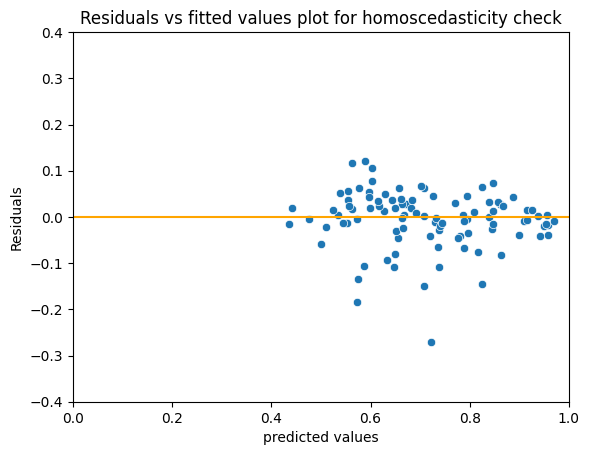

In [ ]:
p = sns.scatterplot(x=pred,y=residual)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26],y= [0,0],color='orange')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
residual.shape,  X_test.shape, X_test_new.shape, y_test.shape, pred.shape, mean_residual.shape

((100,), (100, 8), (100, 7), (100,), (100,), ())

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
lzip(name, test)

[('F statistic', 0.5421223107289667), ('p-value', 0.9748375977319168)]

Here null hypothesis is - error terms are homoscedastic and since p-values >0.05,
we fail to reject the null hypothesis

**Normality of residuals**

Text(0.5, 1.0, 'Normality of error term/residual')

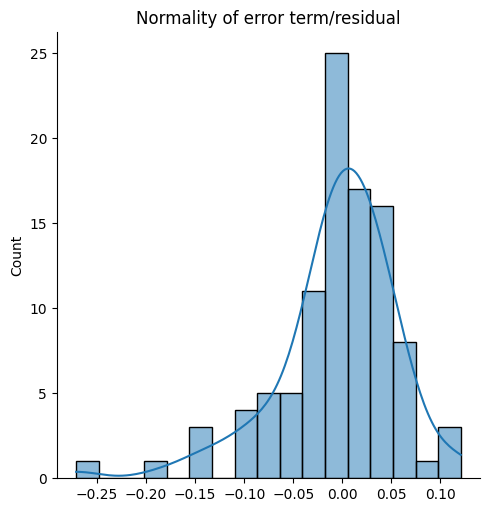

In [ ]:
sns.displot(residual, kde=True)
plt.title('Normality of error term/residual')

Text(0, 0.5, 'predicted values')

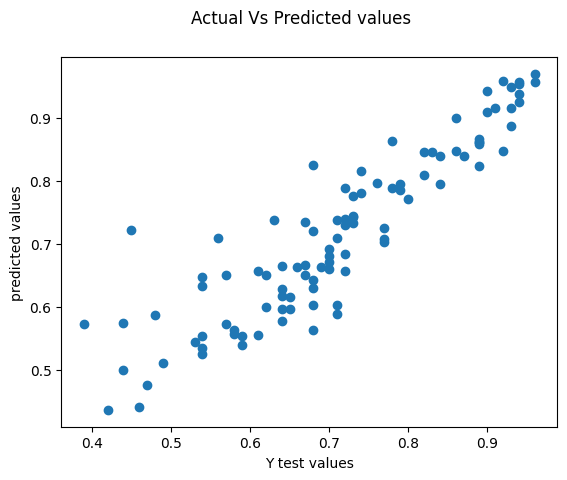

In [ ]:
fig=plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('Actual Vs Predicted values')
plt.xlabel('Y test values')
plt.ylabel('predicted values')

The Plot self explains that the Acctual and predicted is almost same for the hardworing student with probability greater than 0.75

Bias-Variance Tradeoff
* Bias is as a result of over simplified model assumptions
* Variance occurs when the assumptions are too complex
* The more preferred model is one with low bias and low varinace.
* Dimensionality reduction and feature selection can decrease variance by simplifying
models.
* Similarly, a larger training set tends to decrease variance.
* For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that
the training data is diverse and represents all possible groups or outcomes.), Parameter
tuning.
* The bias–variance decomposition forms the conceptual basis for regression
regularization methods such as Lasso and ridge regression.
* Regularization methods introduce bias into the regression solution that can reduce
variance considerably relative to the ordinary least squares (OLS) solution.
* Although the OLS solution provides non-biased regression estimates, the lower variance
solutions produced by regularization techniques provide superior MSE performance.
* Linear and Generalized linear models can be regularized to decrease their variance at
the cost of increasing their bias.